# Logistic Regression Grid Search

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils, plot_help


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, \
                            roc_curve, roc_auc_score, precision_recall_curve

from joblib import dump, load

%matplotlib inline

In [2]:
#change read limit to -1 to load entire dataframe
df_bus = utils.chunk_loader('data/cleaned/business_merge_feats.csv', read_limit=100_000)

In [3]:
#make dataframe of numeric types
df_bus_numeric = df_bus.select_dtypes(include=[np.float64, np.int64]).copy()
df_bus_numeric.shape

(100000, 104)

In [4]:
X_train, X_test, y_train, y_test = utils.train_test_scale (df_bus_numeric, 
                                                           'is_open', 
                                                           random_state=None)

/Users/nadimkawwa/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Logistic Regression with GridSearchCV

In [5]:
#instantiate logistic regression
lr = LogisticRegression(max_iter=200)
#param grid
lr_param = {'penalty': ['l1', 'l2'], 
            'C': [0.1, 1, 10, 100], 
            'solver': ['liblinear'], 
            'class_weight' :['balanced', None]}
#instantite grid search
lr_cv = GridSearchCV(lr, lr_param, cv=5, n_jobs=-1, scoring='roc_auc', verbose=10)
#fit to training data
lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 62.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 74.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100], 'solver': ['liblinear'], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [6]:
#see best combo
print(lr_cv.best_params_ )

print(lr_cv.best_score_)

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
0.7528036781679931


              precision    recall  f1-score   support

           0       0.35      0.65      0.45      3767
           1       0.90      0.72      0.80     16233

   micro avg       0.71      0.71      0.71     20000
   macro avg       0.62      0.68      0.63     20000
weighted avg       0.79      0.71      0.73     20000

----------
Normalized confusion matrix


/Users/nadimkawwa/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


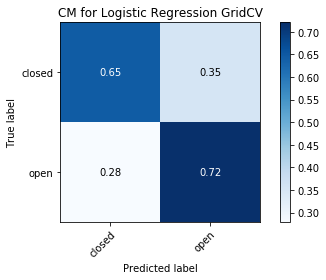

----------


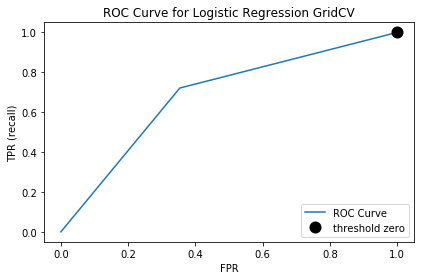

Area Under Curve = 0.6837
----------


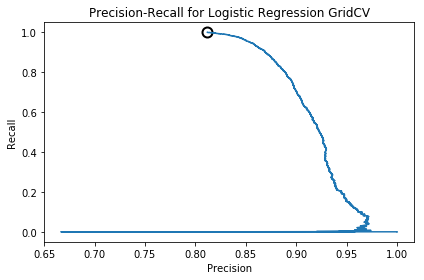

In [7]:
#make pred
y_lr = lr_cv.predict(X_test)

print(classification_report(y_test, y_lr))
print(10*'-')
plot_help.plot_confusion_matrix(y_test, y_lr, ['closed', 'open'], normalize=True,
                                title='Logistic Regression GridCV')
print(10*'-')
plot_help.plot_roc_curve(y_test, y_lr, 'Logistic Regression GridCV')
print(10*'-')
plot_help.plot_prc_curve(y_test, lr_cv.predict_proba(X_test)[:, 1], 'Logistic Regression GridCV')

In [12]:
#save the work
dump(lr_cv, 'classifiers/logreg_cv.joblib') 

['classifiers/logreg_cv.joblib']